<a href="https://colab.research.google.com/github/lucasyanm/coursera-usp-pln-notebooks/blob/main/Semana%2002/02%20-%20NN%20_%20Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.12.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [2]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [3]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [4]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 [==============================] - 2s 15ms/step - loss: 1115.0515
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 3.3315
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 3.1958
Epoch 4/300
4/4 [==============================] - 0s 11ms/step - loss: 3.1100
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 2.9359
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 2.7786
Epoch 7/300
4/4 [==============================] - 0s 11ms/step - loss: 2.6937
Epoch 8/300
4/4 [==============================] - 0s 21ms/step - loss: 2.5843
Epoch 9/300
4/4 [==============================] - 0s 24ms/step - loss: 2.5729
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 2.3674
Epoch 11/300
4/4 [==============================] - 0s 15ms/step - loss: 2.2963
Epoch 12/300
4/4 [==============================] - 0s 13ms/step - loss: 2.2991
Epoch 13/300
4/4 [==============================] 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

1/1 [==============================] - 0s 294ms/step
prediction: [[175.01445]]      real value: 175


In [7]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 [==============================] - 0s 14ms/step - loss: 2.2489e-05


2.248920100100804e-05

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [8]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [9]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [10]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5),
    keras.layers.Dense(5)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 3s 7ms/step - loss: 11.9565
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 11.3495
Epoch 3/400
4/4 [==============================] - 0s 7ms/step - loss: 10.7807
Epoch 4/400
4/4 [==============================] - 0s 9ms/step - loss: 10.2523
Epoch 5/400
4/4 [==============================] - 0s 7ms/step - loss: 9.7321
Epoch 6/400
4/4 [==============================] - 0s 16ms/step - loss: 9.2306
Epoch 7/400
4/4 [==============================] - 0s 9ms/step - loss: 8.7743
Epoch 8/400
4/4 [==============================] - 0s 7ms/step - loss: 8.3352
Epoch 9/400
4/4 [==============================] - 0s 8ms/step - loss: 7.9329
Epoch 10/400
4/4 [==============================] - 0s 7ms/step - loss: 7.5476
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 7.1841
Epoch 12/400
4/4 [==============================] - 0s 8ms/step - loss: 6.8204
Epoch 13/400
4/4 [==============================] - 0s 9

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [13]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.0092


0.009173396974802017

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica




**<font color='red'> Sua resposta aqui </font>**

In [14]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu')
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 5ms/step - loss: 4.4433
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 4.2688
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 4.1082
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 3.9569
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 3.8067
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 3.6683
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 3.5333
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 3.4014
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 3.2792
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 3.1582
Epoch 11/400
4/4 [==============================] - 0s 3ms/step - loss: 3.0465
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 2.9360
Epoch 13/400
4/4 [==============================] - 0s 3ms/st

In [15]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.0034


0.0033995031844824553

In [16]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh')
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 5ms/step - loss: 0.5500
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5356
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5213
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 0.5076
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4941
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4812
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.4688
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 0.4565
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4448
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4334
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4226
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.4125
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [17]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 7ms/step - loss: 0.0045


0.0045117661356925964

In [18]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='sigmoid'),
    keras.layers.Dense(5, activation='sigmoid')
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 0.0932
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0914
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0787
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0773
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0759
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [19]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 5ms/step - loss: 0.0093


0.009290583431720734


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop



**<font color='red'> Sua resposta aqui </font>**

In [20]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh')
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 0.4971
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4628
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 0.4335
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4024
Epoch 5/400
4/4 [==============================] - 0s 5ms/step - loss: 0.3710
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 0.3410
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.3159
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2909
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2657
Epoch 10/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2434
Epoch 11/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2235
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 13/400
4/4 [==============================] - 0s 3ms/st

In [21]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 5ms/step - loss: 0.0095


0.009502071887254715

In [22]:
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh')
])

model.compile(optimizer="RMSprop", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 3ms/step - loss: 0.2471
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3/400
4/4 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1931
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1807
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1696
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1591
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1495
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1403
Epoch 10/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1313
Epoch 11/400
4/4 [==============================] - 0s 5ms/step - loss: 0.1236
Epoch 12/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1152
Epoch 13/400
4/4 [==============================] - 0s 3ms/st

In [23]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 6ms/step - loss: 4.0363e-04


0.0004036327882204205

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




**<font color='red'> Sua resposta aqui </font>**

<small>Dúvida: as funções a cima citadas são de otimização e não de ativação</small>

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?


**<font color='red'> Sua resposta aqui </font>**

In [ ]:
# Usando função de ativação tanh e otimizador RMSprop uma vez que obviteram a menos loss dos testes anteriores
model = tf.keras.Sequential([    
    keras.Input(shape=(1,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh')
])

model.compile(optimizer="RMSprop", loss="mean_squared_error")
model.fit(x,y,epochs=400)

x_val = np.linspace(50,90,63)
y_val = f2(x_val)

In [25]:
model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 5ms/step - loss: 716.4882


716.4882202148438

# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow. 

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [26]:
!mkdir data

In [27]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  32.0M      0 --:--:-- --:--:-- --:--:-- 31.9M


Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados. 

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*. 



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




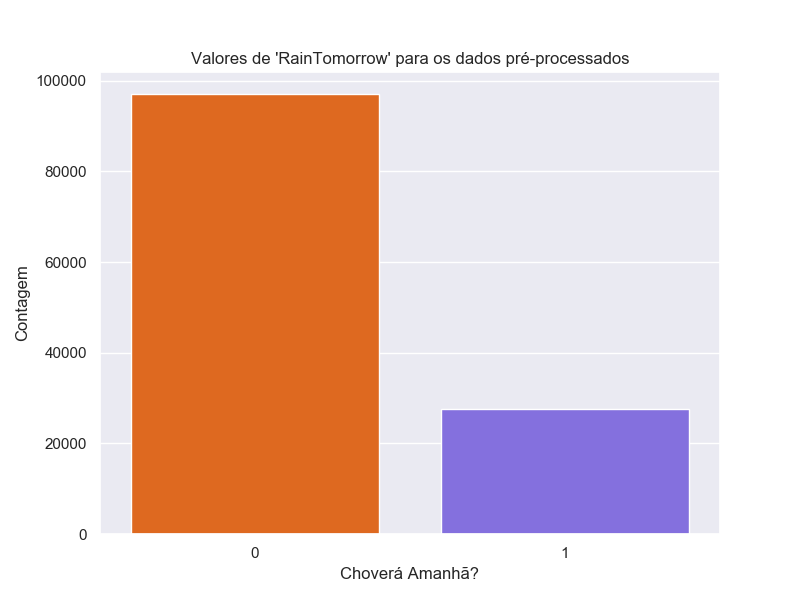



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado. 

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [28]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [49]:
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    raw_data = pd.read_csv('data/weatherAUS.csv')
    raw_data = raw_data[['RainTomorrow', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday']].copy()

    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    processed_data = raw_data.copy()
    
    processed_data['RainTomorrow'] = processed_data['RainTomorrow'].map(lambda r: 1 if r == 'Yes' else 0)
    processed_data['RainToday'] = processed_data['RainToday'].map(lambda r: 1 if r == 'Yes' else 0)
    processed_data = processed_data.dropna().reset_index(drop=True)
    
    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    from sklearn.model_selection import train_test_split

    x = data[data.columns[1:]].values
    y = data[data.columns[0]].values

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=val_size)
    
    return x_train, x_val, y_train, y_val


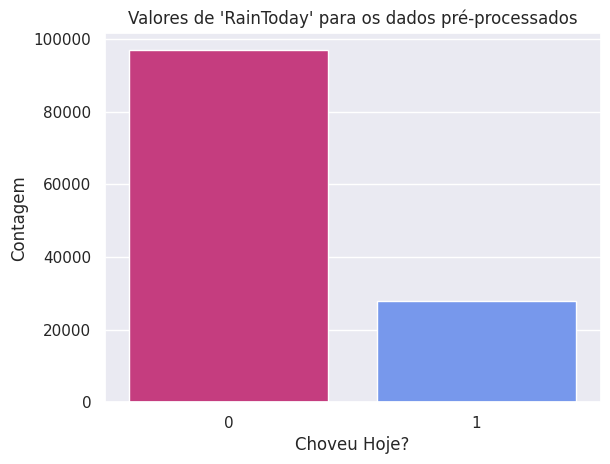

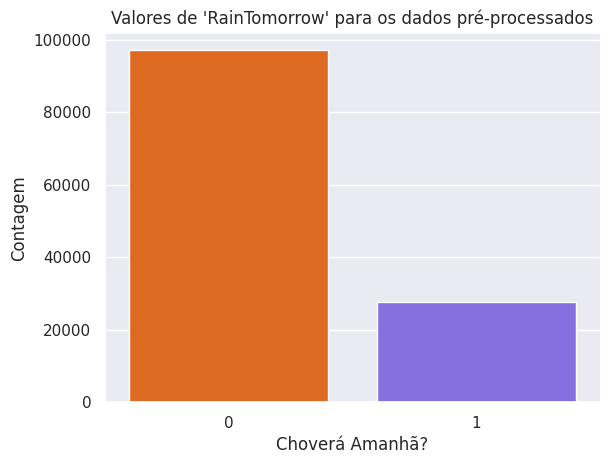

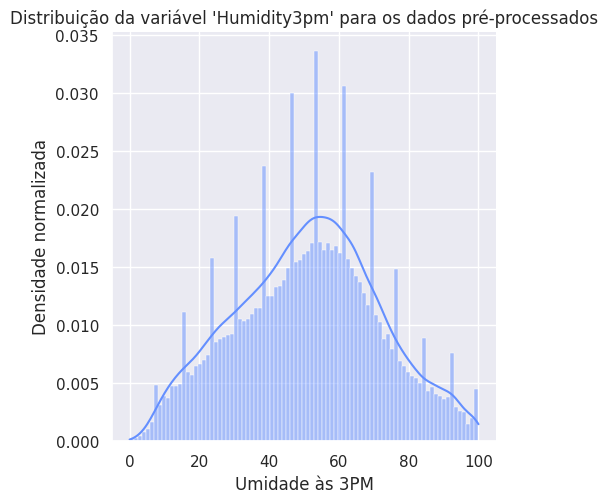

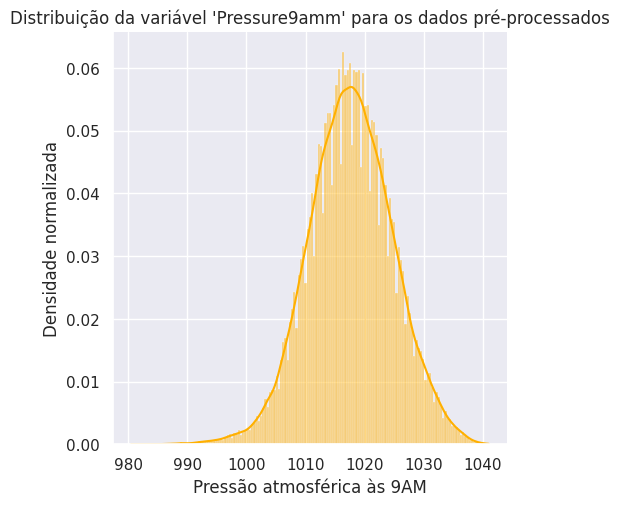

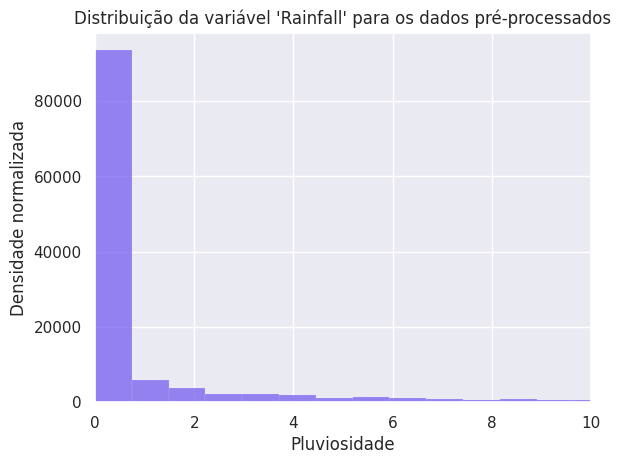

In [50]:
df = load_data()
df = pre_processing(df)
visualize_data(df)

In [51]:
x_train, x_val, y_train, y_val = split_data(df,)

In [52]:
x_train

array([[1.8000e+00, 3.4000e+01, 1.0053e+03, 1.0000e+00],
       [8.0000e-01, 7.4000e+01, 1.0166e+03, 0.0000e+00],
       [1.0000e+01, 6.3000e+01, 1.0107e+03, 1.0000e+00],
       ...,
       [1.2400e+01, 4.2000e+01, 1.0183e+03, 1.0000e+00],
       [2.0000e-01, 7.1000e+01, 1.0105e+03, 0.0000e+00],
       [4.3000e+01, 5.8000e+01, 1.0157e+03, 1.0000e+00]])

In [53]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [57]:
model = tf.keras.Sequential([    
    keras.Input(shape=(None,4)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
3118/3118 [==============================] - 11s 3ms/step - loss: 0.4424 - accuracy: 0.8129 - val_loss: 0.4315 - val_accuracy: 0.8339
Epoch 2/20
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4307 - accuracy: 0.8178 - val_loss: 0.4260 - val_accuracy: 0.8175
Epoch 3/20
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4309 - accuracy: 0.8173 - val_loss: 0.4297 - val_accuracy: 0.8204
Epoch 4/20
3118/3118 [==============================] - 7s 2ms/step - loss: 0.4318 - accuracy: 0.8175 - val_loss: 0.4271 - val_accuracy: 0.8138
Epoch 5/20
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4313 - accuracy: 0.8137 - val_loss: 0.4287 - val_accuracy: 0.8125
Epoch 6/20
3118/3118 [==============================] - 7s 2ms/step - loss: 0.4309 - accuracy: 0.8200 - val_loss: 0.4360 - val_accuracy: 0.8333
Epoch 7/20
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4298 - accuracy: 0.8183 - val_loss: 0.4232 - val_accuracy